
 #                  DATA MINING ( CS 634) FINAL TERM PROJECT 
 #                                        OPTION 1
 #                  SUPERVISED DATA MINING ( CLASSIFICATION)
 
 
 
 
 
 
 
 
 #                       PROFESSOR : DR JASON WANG, NJIT.


# Predicting Bike rentals using Decision Tree and Random Forest Classifiers 
## Data Source : Kaggle.com 
### Problem:
### Data sets: 

In [3]:
# Exploring dataset and analyzing data
import pandas as pd 
import numpy as np
train_dataframe = pd.read_csv('train.csv')

In [4]:
train_dataframe.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
###Defining function to create new features to be used in exploration ###########
def new_date_features(dataframe: pd)-> None:
    '''Creating new features :
        Creating new columns on datetime timestamp
    New Features are:
    year
    month
    day_of_week
    hour
    :param df: train dataset
        '''
train_dataframe['year'] = train_dataframe.datetime.map(
    lambda x: pd.to_datetime(x).year ).astype(int)
train_dataframe['month'] = train_dataframe.datetime.map(
    lambda x: pd.to_datetime(x).month ).astype(int)
train_dataframe['dayofweek'] = train_dataframe.datetime.map(
    lambda x: pd.to_datetime(x).dayofweek ).astype(int)
train_dataframe['hour'] = train_dataframe.datetime.map(
    lambda x: pd.to_datetime(x).hour ).astype(int)




In [6]:
#new dataframe with new features for dates
new_date_features(train_dataframe)

In [7]:
train_dataframe.head(2)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1


In [8]:
#########################################################################################################################
#Analyzing data sets using box plots
#########################################################################################################################
train_boxplot_df= train_dataframe.drop(['year','casual','registered','count'],axis=1)

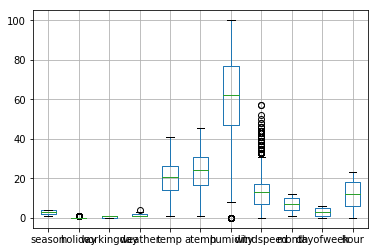

In [10]:
#plotting the graph
import matplotlib as plt
plot1 = train_boxplot_df.boxplot()


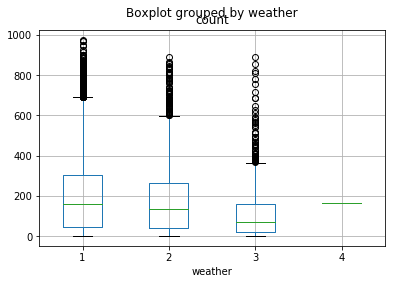

In [11]:
## correlation between count vs weather data 
train_dataframe.boxplot(column='count', by='weather')


we can see max,  min, average and outliers from the box plot 

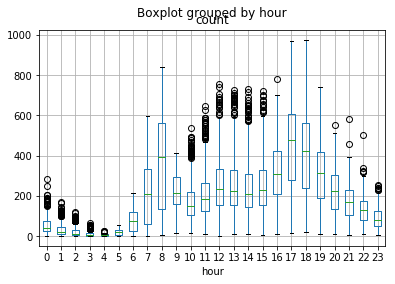

In [12]:
#count based on hour analysis
train_dataframe.boxplot(column='count', by='hour')

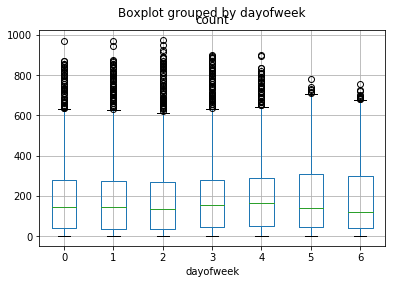

In [13]:
#count based on days of week  analysis
train_dataframe.boxplot(column='count',by='dayofweek')

In [14]:
#mapping days of week to name of week
days={
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Satruday'
}

In [15]:
train_dataframe['namedayofweek']= train_dataframe['dayofweek'].map(days)

In [16]:
###########################################################################################################################
#Correlation matrix
#Matrix for us to know the correlation between various factors/attributes/columns in predicting target label i.e count
#Also to identify positive or negative correlation between them and label
#WE could remove correlated features
###########################################################################################################################
print(train_dataframe[['weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr())

             weather      temp     atemp  humidity  windspeed    casual  \
weather     1.000000 -0.055035 -0.055376  0.406244   0.007261 -0.135918   
temp       -0.055035  1.000000  0.984948 -0.064949  -0.017852  0.467097   
atemp      -0.055376  0.984948  1.000000 -0.043536  -0.057473  0.462067   
humidity    0.406244 -0.064949 -0.043536  1.000000  -0.318607 -0.348187   
windspeed   0.007261 -0.017852 -0.057473 -0.318607   1.000000  0.092276   
casual     -0.135918  0.467097  0.462067 -0.348187   0.092276  1.000000   
registered -0.109340  0.318571  0.314635 -0.265458   0.091052  0.497250   
count      -0.128655  0.394454  0.389784 -0.317371   0.101369  0.690414   

            registered     count  
weather      -0.109340 -0.128655  
temp          0.318571  0.394454  
atemp         0.314635  0.389784  
humidity     -0.265458 -0.317371  
windspeed     0.091052  0.101369  
casual        0.497250  0.690414  
registered    1.000000  0.970948  
count         0.970948  1.000000  


In [17]:
###########################################################################################################3
#Preparing the test data with the new features to test our model 
test_df = pd.read_csv('test.csv',header=0)
test_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [18]:
import pandas as pd 
def new_date_features1(dataframe: pd)-> None:
    '''Creating new features :
        Creating new columns on datetime timestamp
    New Features are:
    year
    month
    day_of_week
    hour
    :param df: train dataset
        '''
test_df['year'] = test_df.datetime.map(
    lambda x: pd.to_datetime(x).year ).astype(int)
test_df['month'] = test_df.datetime.map(
    lambda x: pd.to_datetime(x).month ).astype(int)
test_df['dayofweek'] = test_df.datetime.map(
    lambda x: pd.to_datetime(x).dayofweek ).astype(int)
test_df['hour'] = test_df.datetime.map(
    lambda x: pd.to_datetime(x).hour ).astype(int)


In [19]:
# function call to create additional columns like train data 
new_date_features1(test_df)
test_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


In [20]:
test_data_timestamp=test_df['datetime'] #column to store timestamps of test data 
test_df=test_df.drop(['datetime'],axis=1) # dropping the unnecessary column- timestamp
print("test_df= ", list(test_df))

test_df=  ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'dayofweek', 'hour']


In [21]:
#######################################################################################################
#Testing the model with classifiers - Random Forest and Decision Tree
#Random forest is used from the sklearn.ensemble in python with 120 trees
#####n_estimators are selected with trail and error method
#Decision Tree has been used from sklearn.tree in python 
## To predict 'count' label
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Classifier  



In [22]:
target_dataframe = train_dataframe['count'] #y
predictors_dataframe_train = train_dataframe.drop(['datetime','casual','registered','count','namedayofweek'],axis=1)

#printing predictors 
predictors= list(predictors_dataframe_train)

#numpy array to give an input to the decision tree or random forest classifier
target_dataframe= target_dataframe.values
predictors_dataframe_train=predictors_dataframe_train.values
predictors_dataframe_test = test_df.values

########################################################################################################
#Random Forest Classifier 
########################################################################################################
random_forest = RandomForestClassifier(n_estimators = 120)
#fit data set in random forest
random_forest = random_forest.fit (predictors_dataframe_train,target_dataframe)
 
#####################################################################################################
#Decision Tree Classifier
######################################################################################################
forest_decisiontree = DecisionTreeClassifier()
forest_decisiontree = forest_decisiontree.fit(predictors_dataframe_train,target_dataframe)



In [24]:
#######################################################################################################
#Predicting the count and saving it into a file 
import csv 
count_pred_random_forest = random_forest.predict(predictors_dataframe_test).astype(int)
count_pred_decision_tree = forest_decisiontree.predict(predictors_dataframe_test).astype(int)

def write_to_file( 
            filename,
            test_data_timestamp,
            predicted_dataframe
):
        with open(filename, 'w') as fobj:
            fobj_write = csv.writer(fobj)
            fobj_write.writerow(["datetime","casual"])
            fobj_write.writerows(zip(test_data_timestamp, predicted_dataframe))
            
write_to_file(
        "RANDOM_FOREST_FILE.csv",
        test_data_timestamp,
        count_pred_random_forest,
)
        
write_to_file(
        "DECISION_TREE_FILE.csv",
        test_data_timestamp,
        count_pred_decision_tree,
)
        
        

In [25]:
###################################################################################
#Printing important features using random forest 
###########################################################################
print(pd.DataFrame(
                random_forest.feature_importances_,
                columns =['Importance'],
                index = predictors).sort_values(['Importance'],ascending =False))

            Importance
hour          0.187810
windspeed     0.155438
humidity      0.151463
atemp         0.120161
temp          0.118780
dayofweek     0.085157
month         0.072002
weather       0.044696
season        0.024719
year          0.021866
workingday    0.013626
holiday       0.004283


In [26]:
# COMPARSION OF DECISION TREE AND RANDOM FOREST USING CONFUSION MATRIX ( VALIDATION SETS)
# Below snapshot creates validation dataset on split training into 80% train and 20% validation tests 
# Now by training my model using new train datasets and apply it on validation sets . Then obtain confusion matrix using both Random Forest and 
#decision tree 
#important features using random forest 
print(pd.DataFrame(
random_forest.feature_importances_,columns=["Importance"],index= predictors).sort_values(['Importance'],ascending=False))

            Importance
hour          0.187810
windspeed     0.155438
humidity      0.151463
atemp         0.120161
temp          0.118780
dayofweek     0.085157
month         0.072002
weather       0.044696
season        0.024719
year          0.021866
workingday    0.013626
holiday       0.004283


In [27]:
#####################################################
# RoC curve for random forest and decision tree with cross validation comparsion of models
#####################################################
#dividing training dataset into training and validation data set 
train, validation = train_test_split(train_dataframe, test_size=0.2)
vaidate_data_timestamp = validation['datetime']

In [39]:
train_dataframe.head(10887)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour,namedayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5,0,Friday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5,1,Friday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5,2,Friday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5,3,Friday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5,4,Friday
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,5,5,Friday
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,5,6,Friday
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,5,7,Friday
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,5,8,Friday
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,5,9,Friday


In [40]:
train.head(8772)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour,namedayofweek
1922,2011-05-07 00:00:00,2,0,0,1,17.22,21.210,82,8.9981,10,76,86,2011,5,5,0,Friday
5169,2011-12-09 11:00:00,4,0,1,1,13.12,15.150,70,16.9979,15,121,136,2011,12,4,11,Thursday
5394,2011-12-18 20:00:00,4,0,0,1,9.84,12.880,60,7.0015,10,94,104,2011,12,6,20,Satruday
4107,2011-10-03 04:00:00,4,0,1,1,13.94,17.425,87,7.0015,2,6,8,2011,10,0,4,Sunday
464,2011-02-02 10:00:00,1,0,1,2,9.02,13.635,100,0.0000,2,59,61,2011,2,2,10,Tuesday
7713,2012-06-01 18:00:00,2,0,1,3,25.42,28.030,88,23.9994,10,100,110,2012,6,4,18,Thursday
6912,2012-04-06 08:00:00,2,0,1,1,12.30,13.635,49,22.0028,19,489,508,2012,4,4,8,Thursday
10780,2012-12-15 14:00:00,4,0,0,1,16.40,20.455,50,11.0014,92,334,426,2012,12,5,14,Friday
6530,2012-03-09 08:00:00,1,0,1,2,13.94,14.395,42,35.0008,17,484,501,2012,3,4,8,Thursday
9151,2012-09-04 16:00:00,3,0,1,1,31.16,36.365,70,27.9993,61,397,458,2012,9,1,16,Monday


In [41]:
validation.head(2177)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour,namedayofweek
3153,2011-08-01 07:00:00,3,0,1,1,30.34,34.090,62,0.0000,24,258,282,2011,8,0,7,Sunday
7017,2012-04-10 17:00:00,2,0,1,1,22.96,26.515,21,35.0008,88,656,744,2012,4,1,17,Monday
10113,2012-11-06 18:00:00,4,0,1,1,13.12,15.150,57,19.9995,20,477,497,2012,11,1,18,Monday
6180,2012-02-13 18:00:00,1,0,1,1,13.94,15.910,25,16.9979,6,399,405,2012,2,0,18,Sunday
5153,2011-12-08 19:00:00,4,0,1,1,10.66,13.635,56,7.0015,12,220,232,2011,12,3,19,Wednesday
6419,2012-03-04 17:00:00,1,0,0,1,13.94,14.395,31,36.9974,49,214,263,2012,3,6,17,Satruday
3540,2011-08-17 10:00:00,3,0,1,1,31.16,34.090,43,6.0032,27,91,118,2011,8,2,10,Tuesday
4245,2011-10-08 22:00:00,4,0,0,1,20.50,24.240,77,0.0000,45,104,149,2011,10,5,22,Friday
9953,2012-10-19 02:00:00,4,0,1,2,22.14,25.760,88,0.0000,1,9,10,2012,10,4,2,Thursday
8238,2012-07-04 15:00:00,3,1,0,1,37.72,42.425,35,19.9995,155,299,454,2012,7,2,15,Tuesday


In [42]:
#Preparing Training Set
training_set_target_value = train["count"]
training_set = train.drop(['datetime','casual','registered','count','namedayofweek'],axis=1)

In [43]:
#preparing validation dataset 
validation_count = validation["count"]
validation_set=  validation.drop(['datetime','casual','registered','count','namedayofweek'],axis=1)

In [44]:
#training your model on training datset
#numpy array to give input to random forest or decision tree classifiers
training_set_target_value = training_set_target_value.values
training_set = training_set.values
validation_set = validation_set.values


In [45]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=120)
#fit dataset in random forest
random_forest = random_forest.fit(training_set, training_set_target_value)

In [46]:
# Decision Tree Classifier 
forest_decisiontree = DecisionTreeClassifier()
forest_decisiontree = forest_decisiontree.fit(training_set, training_set_target_value)

In [48]:
#predicting count and saving it to file 
validation_pred_random_forest = random_forest.predict(validation_set).astype(int)
validation_pred_decision_tree = forest_decisiontree.predict(validation_set).astype(int)


In [49]:
write_to_file(
        "Validate_RANDOM_FOREST_FILE.csv",
        vaidate_data_timestamp,
        validation_pred_random_forest,
)
        
write_to_file(
        "Validate_DECISION_TREE_FILE.csv",
        vaidate_data_timestamp,
        validation_pred_decision_tree,
)



In [51]:
## confusion matrix for random forest 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat_RF = confusion_matrix(validation_count, validation_pred_random_forest)
print(conf_mat_RF)


[[8 5 5 ... 0 0 0]
 [5 4 3 ... 0 0 0]
 [3 9 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
conf_mat_DT = confusion_matrix(validation_count, validation_pred_decision_tree)
print(conf_mat_DT)

[[7 6 2 ... 0 0 0]
 [3 2 4 ... 0 0 0]
 [8 5 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
